# Convolutional Neural Networks for Fashion

This notebook extends your work on classifying fashion items to use image specific operators.

How does your deep convolutional neural network do against simple logistic regression?

To get some ideas for the structure of your network take a look at the benchmark results here: https://github.com/zalandoresearch/fashion-mnist#benchmark (scroll past the animated GIF). You will find a ranking of algorithms using various convolutional layers and dropout/pooling often with a link to the GitHub repository.

This notebook gives you the basic structure. Explore and add to it! For example which samples are misclassified? Is there a category that is harder than others? How small can you make the training data before you lose accuracy? How complex can you make your model? What is your baseline model that you are comparing to? What happens if you perturb the images a bit by adding noise (or otherwise perturbing them)?

Note: If you try anything moderately complex in terms of model get yourself setup on http://colab.research.google.com/ to take advantage of their GPU support.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

In [2]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras import utils

Using TensorFlow backend.


## Load fashion MNIST

In [3]:
from keras.datasets import fashion_mnist

num_classes = 10

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train.reshape(X_train.shape[0], 28, 28, -1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, -1)

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [4]:
# number of filters
filters = 32
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size
kernel_size = 3

input_shape = (28, 28, 1)

batch_size = 128
epochs = 5

feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

# create complete model
mnist_model = Sequential(feature_layers + classification_layers)

In [5]:
mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

## Show a summary of the model architecture

In [6]:
# most of the parameters are in the fully connected part of the network
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
__________

In [7]:
history = mnist_model.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 110s 2ms/step - loss: 0.5964 - acc: 0.7851 - val_loss: 0.3786 - val_acc: 0.8598
Epoch 2/5
48000/48000 [==============================] - 103s 2ms/step - loss: 0.3913 - acc: 0.8601 - val_loss: 0.3029 - val_acc: 0.8885
Epoch 3/5
48000/48000 [==============================] - 111s 2ms/step - loss: 0.3332 - acc: 0.8808 - val_loss: 0.2758 - val_acc: 0.8968
Epoch 4/5
48000/48000 [==============================] - 104s 2ms/step - loss: 0.2988 - acc: 0.8920 - val_loss: 0.2505 - val_acc: 0.9077
Epoch 5/5
48000/48000 [==============================] - 105s 2ms/step - loss: 0.2725 - acc: 0.9015 - val_loss: 0.2420 - val_acc: 0.9099


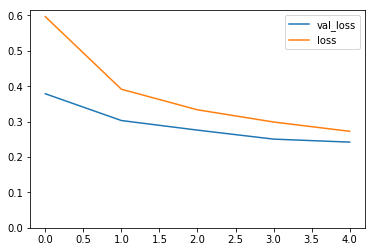

In [8]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.ylim([0, None])
plt.legend()

From this graph it looks like this model hasn't been trained to convergence yet. Increase the number opf epochs slightly to fix that, or change the architecture. Time to explore (and get yourself setup on http://colab.research.google.com/.